In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('bmh_TGV1')
import matplotlib.gridspec as gridspec

from Optics import Beam, Tilt_beam, Offset_beam
from HHG import ActiveGrating


In [6]:
IR = Beam(w0=40e-6, lam=800e-9)

theta = 0.02
theta_range=np.linspace(np.pi/4, 5*np.pi/4, 50)
alpha_range = np.cos(2*theta_range)*0.3

grid = IR.FocusGrid(Lx=0.5, Ly=0.5, Nx=1000, Ny=1000, d=1)

E1 = IR.GBeam(*grid, z=0)
E2 = IR.GBeam(*Offset_beam(*Tilt_beam(*grid, z=0, angle=theta), x0=0, y0=0))



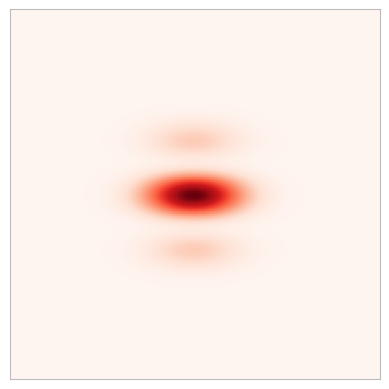

In [7]:
plt.imshow(np.abs(E1+0.5*E2)**2, cmap='Reds')

#np.save('NF_plus.npy', np.abs(E1+0.3*E2)**2)
#np.save('NF_grating50mrad.npy', np.abs(E1-0.3*E2)**2)

plt.xlim(430, 570)
plt.ylim(430, 570)

#plt.xlabel("$x$")
plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
#plt.ylabel("$y$")

In [8]:
AG = ActiveGrating(qeff=3.5)
q=15
XUV = Beam(w0=1e-6, lam=IR.lam/q)

plot = []

for alpha in alpha_range:
    E = E1 + alpha*E2
    XUV_NF = AG.Hq_NearField(IRfield=E, q=q)
    XUV_FF, grid_FF = XUV.Fraunhofer(field_0=XUV_NF, grid_0=grid, d=1)
    column = np.sum(np.abs(XUV_FF)**2, axis=1) # integrate intensity of the orders on the transverse axis
    plot.append(column)

plot=np.array(plot).T/np.max(plot)

(600.0, 400.0)

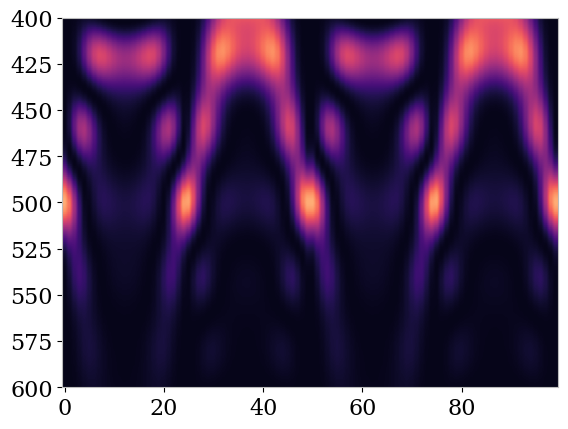

In [9]:
test = np.concatenate([plot, plot], axis=1)
#test = np.concatenate([test , test], axis=1)
plt.imshow(test, aspect='auto', cmap='magma', vmax=1, vmin=-0.05)
plt.ylim(600, 400)

In [211]:
x, y = grid_FF[0][0], grid_FF[1].T[0]

np.save('sim_orders.npy', np.array([theta_range, x, test], dtype=object))